# Algorithmic Trading Strategy (Bollinger Bands)

## Before we start, let's go through the theory behind this strategy.

### The backing of this strategy revolves around the assumption that the prices of non-derivative assets will trade in a normal distribution. This means that when an asset price’s stock moves greater than 2 standard deviations away from its normal range, it can be considered an outlier that must be traded against.

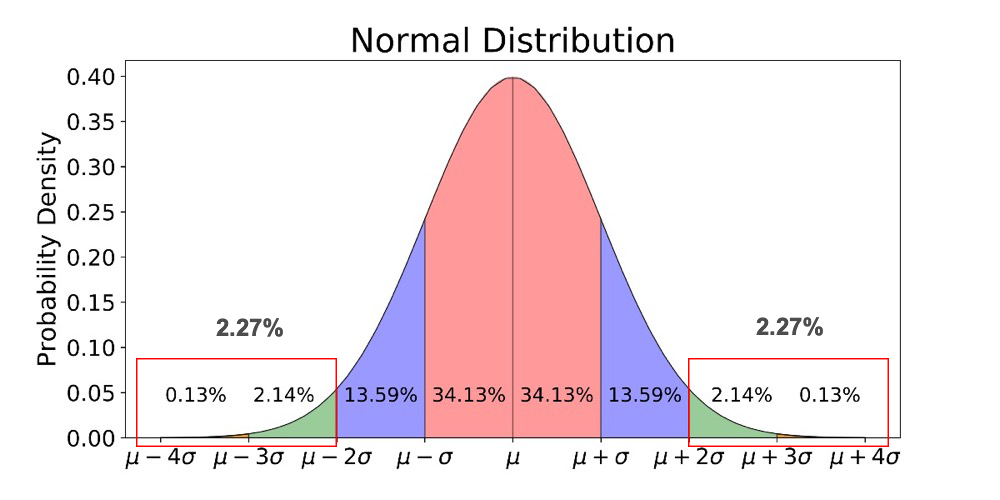

## For Example: If the standard deviation of the close price is larger than +2 , then you should Sell your stock and if the standard deviation of the close price is less than -2 , then you should Buy more.

# 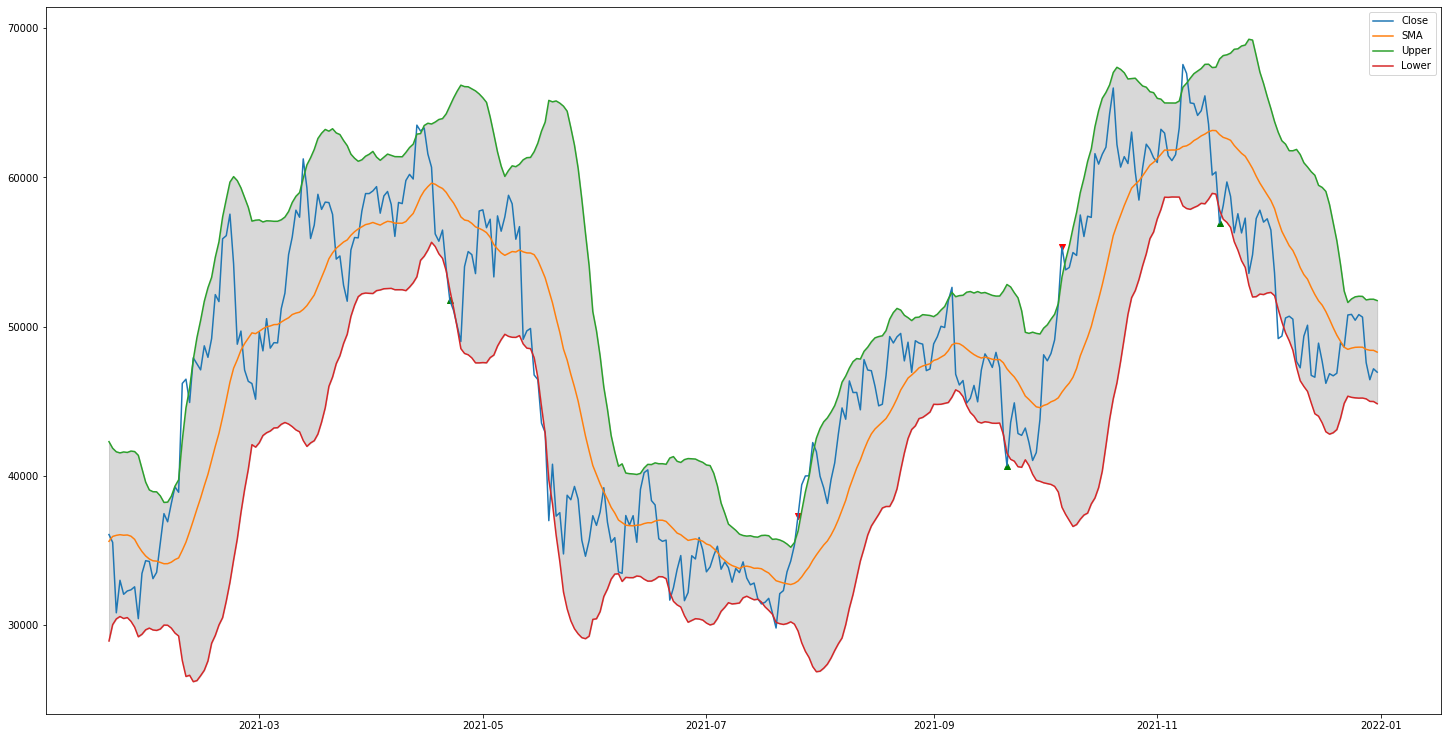

# -------------------------------------------------------------------------

In [5]:
pip install yfinance


     |████████████████████████████████| 63 kB 3.5 MB/s  eta 0:00:01
  Created wheel for multitasking: filename=multitasking-0.0.10-py3-none-any.whl size=8488 sha256=719c94f5e43757613e1110bfca08d29ab1ea67ab5514432d09852820d5bf0eaf
  Stored in directory: /Users/forestlinlinlinlinlin/Library/Caches/pip/wheels/21/c9/66/b41c847de65c7985db52ec21d59996841598b8b0e93f2b9500
Successfully built multitasking
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.
anaconda-project 0.9.1 requires ruamel-yaml, which is not installed.
Note: you may need to restart the kernel to use updated packages.


# Bitcoin Price
## Get Bitcoin Data from yfinance (every day for 1 year)

In [66]:
import yfinance as yf
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

data = yf.download(tickers = ('NFLX'), 
                   period = '1y', 
                   interval = '1d',
                   auto_adjust = True)
df = pd.DataFrame(data)
df


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2021-01-15,500.000000,506.320007,495.100006,497.980011,5895800
2021-01-19,501.000000,509.250000,493.540009,501.769989,12315800
2021-01-20,565.419983,593.289978,556.859985,586.340027,32637500
2021-01-21,582.450012,588.750000,570.400024,579.840027,11802100
2021-01-22,582.099976,583.989990,564.349976,565.169983,7550800
...,...,...,...,...,...
2022-01-10,538.489990,543.690002,526.320007,539.849976,4486100
2022-01-11,536.989990,543.909973,530.070007,540.840027,3077800
2022-01-12,544.270020,544.270020,532.020020,537.219971,3787400


In [67]:
## Simple Moving Average (SMA) for 30 days
df['SMA'] = df.Close.rolling(window=15).mean()

## standard deviations for 20 days
df['stddev'] = df.Close.rolling(window=15).std()

## Upper is 2 standard deviations above SMA and Lower is 1 standard deviations below SMA
df['Upper'] = df.SMA + 1 * df.stddev
df['Lower'] = df.SMA - 1 * df.stddev

## Generate the Buy_signal and Sell_signal based on the strategy
df['Buy_signal'] = np.where(df.Close < df.Lower, True, False)
df['Sell_signal'] = np.where(df.Close > df.Upper, True, False)

## Remove nan value
df = df.dropna()
df

,Open,High,Low,Close,Volume,SMA,stddev,Upper,Lower,Buy_signal,Sell_signal
Date,,,,,,,,,,,
2021-02-05,552.260010,554.440002,545.479980,550.789978,2376200,544.912000,24.881824,569.793823,520.030176,False,False
2021-02-08,555.000000,555.000000,543.700012,547.919983,2791700,548.241331,21.226065,569.467396,527.015266,False,False
2021-02-09,546.000000,566.000000,543.000000,559.070007,3703500,552.061332,17.000904,569.062236,535.060428,False,False
2021-02-10,562.500000,566.650024,553.460022,563.590027,3991300,550.544666,14.564654,565.109320,535.980011,False,False
2021-02-11,564.440002,565.929993,554.219971,557.590027,2730600,549.061332,12.329473,561.390806,536.731859,False,False
...,...,...,...,...,...,...,...,...,...,...,...
2022-01-10,538.489990,543.690002,526.320007,539.849976,4486100,591.075334,27.036973,618.112307,564.038360,True,False
2022-01-11,536.989990,543.909973,530.070007,540.840027,3077800,587.548669,29.956989,617.505658,557.591681,True,False
2022-01-12,544.270020,544.270020,532.020020,537.219971,3787400,583.035335,32.170926,615.206261,550.864409,True,False


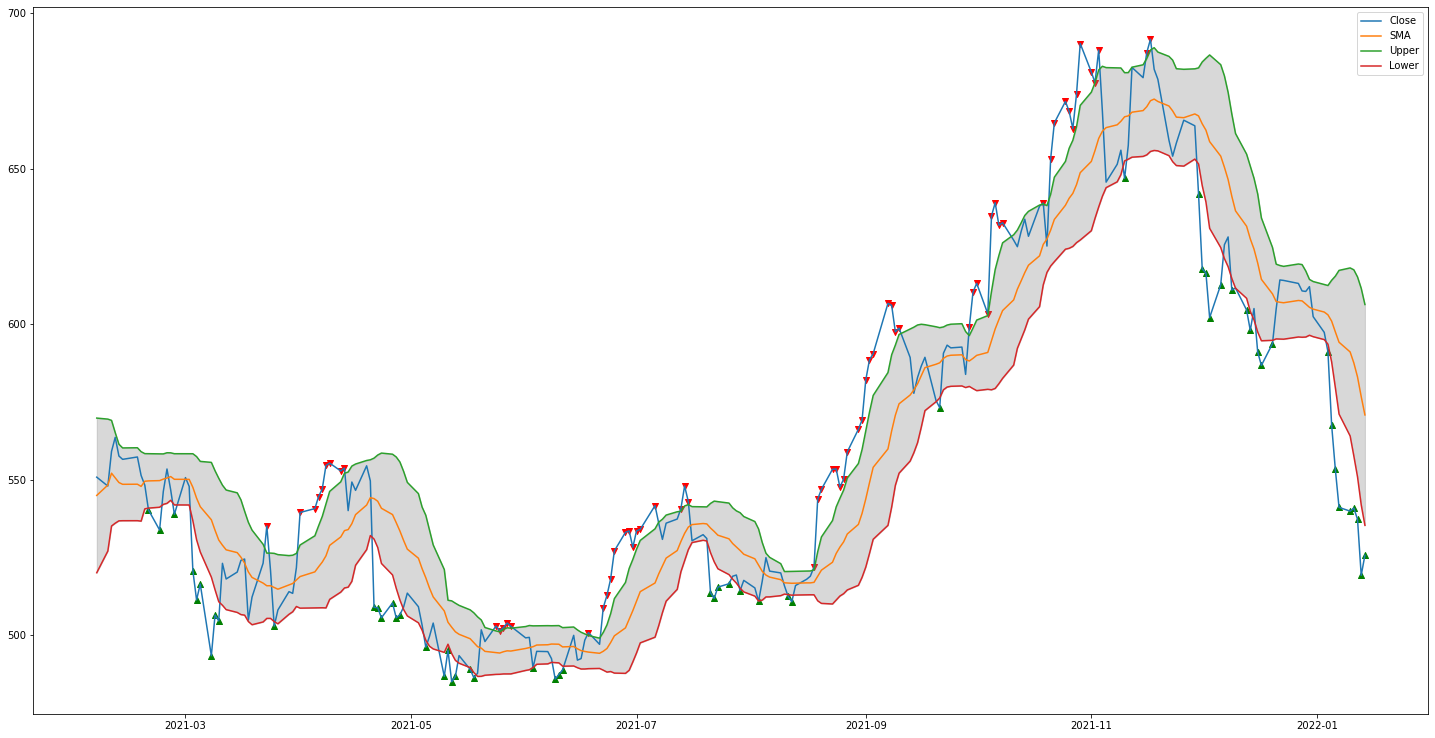

In [68]:
## plot figure size 
plt.figure(figsize= (25,13))

## plot 4 lines
plt.plot(df[['Close', 'SMA', 'Upper', 'Lower']])

## plot Buy and Sell scatter to our visualization
plt.scatter(df.index[df.Buy_signal], df[df.Buy_signal].Close, marker='^', color = 'g')
plt.scatter(df.index[df.Sell_signal], df[df.Sell_signal].Close, marker='v', color = 'r')

## Fill the middle area with grey color
plt.fill_between(df.index, df.Upper, df.Lower, color = 'grey', alpha = 0.3)

## show plot legend
plt.legend(['Close', 'SMA', 'Upper', 'Lower'])

## show plot
plt.show()

# Improve our buy and sell signal (Buy 1 Sell 1)

In [69]:
## Define new lists and stock_on_hand

buy = []
sell = []
stock_on_hand = False

## change multiple buy and sell to only 1 buy and 1 sell

for i in range(len(df)):
    if df.Close[i] < df.Lower[i]:
        if stock_on_hand == False:
            buy.append(i)
            stock_on_hand = True
    elif df.Close[i] > df.Upper[i]:
        if stock_on_hand == True:
            sell.append(i)
            stock_on_hand = False

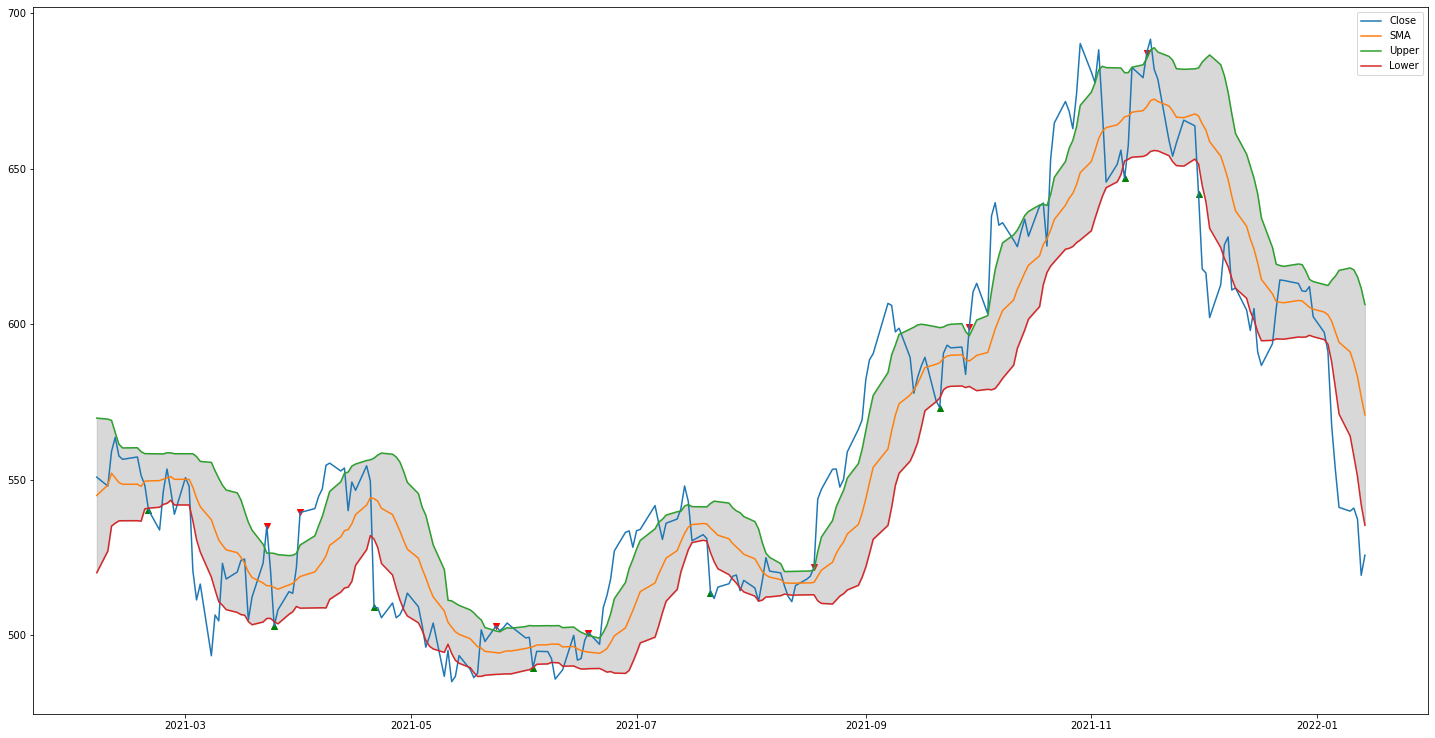

In [70]:
## plot figure size 
plt.figure(figsize= (25,13))

## plot 4 lines
plt.plot(df[['Close', 'SMA', 'Upper', 'Lower']])

## plot Buy and Sell scatter to our visualization
plt.scatter(df.iloc[buy].index, df.iloc[buy].Close, marker='^', color = 'g')
plt.scatter(df.iloc[sell].index, df.iloc[sell].Close, marker='v', color = 'r')

## Fill the middle area with grey color
plt.fill_between(df.index, df.Upper, df.Lower, color = 'grey', alpha = 0.3)

## show plot legend
plt.legend(['Close', 'SMA', 'Upper', 'Lower'])

## show plot
plt.show()

# Check if you can make profit based on this strategy

In [71]:
share = 1000
profit = 0

for i in range(len(sell)):
    
    profit = profit - (df.iloc[buy[i]].Close * share)
    profit = profit + (df.iloc[sell[i]].Close * share)
    
profit

111420.07446289062